In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [3]:
cred = pd.read_csv('../data/credit.csv')

In [36]:
cred.head(2)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2


In [37]:
cred.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
job                     object
dependents               int64
telephone               object
foreign_worker          object
default                  int64
dtype: object

In [38]:
cred.isnull().any()

checking_balance        False
months_loan_duration    False
credit_history          False
purpose                 False
amount                  False
savings_balance         False
employment_length       False
installment_rate        False
personal_status         False
other_debtors           False
residence_history       False
property                False
age                     False
installment_plan        False
housing                 False
existing_credits        False
job                     False
dependents              False
telephone               False
foreign_worker          False
default                 False
dtype: bool

In [39]:
cred['telephone'].value_counts()

none    596
yes     404
Name: telephone, dtype: int64

In [40]:
# checking unique values in each column
for i in cred.columns:
    print(i)
    #print(cred[i].nunique())

checking_balance
months_loan_duration
credit_history
purpose
amount
savings_balance
employment_length
installment_rate
personal_status
other_debtors
residence_history
property
age
installment_plan
housing
existing_credits
job
dependents
telephone
foreign_worker
default


In [41]:
categorical_cols = ['checking_balance',
'months_loan_duration',
'credit_history',
'purpose',
'amount',
'savings_balance',
'employment_length',
'installment_rate',
'personal_status',
'other_debtors',
'residence_history',
'property',
'age',
'installment_plan',
'housing',
'existing_credits',
'job',
'dependents',
'telephone',
'foreign_worker']

In [42]:
# create label encoder class
le = LabelEncoder()


In [43]:
for col in categorical_cols:
    cred[col] = le.fit_transform(cred[col])

In [44]:
cred.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,2,0,7,142,4,3,3,3,2,...,2,48,1,1,1,1,0,1,1,1
1,0,29,4,7,770,2,1,1,1,2,...,2,3,1,1,0,1,0,0,1,2
2,3,8,0,4,390,2,2,1,3,2,...,2,30,1,1,0,3,1,0,1,1
3,1,26,4,5,848,2,2,1,3,1,...,0,26,1,0,0,1,1,0,1,1
4,1,17,1,1,734,2,1,2,3,2,...,3,34,1,0,1,1,1,0,1,2


In [45]:
X = cred.drop('default',axis =1)
y = cred.default 

In [1]:
y.shape

NameError: name 'y' is not defined

In [47]:
X.shape

(1000, 20)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [49]:
clfr = RandomForestClassifier(criterion = 'entropy',
                              max_depth = 15,
                              n_estimators = 200)

In [60]:
print(X_test.shape)
print(y_test.shape)
y_test.dtype

(300, 20)
(300,)


dtype('int64')

In [50]:
clfr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=200)

In [51]:
clfr.predict(X_train)

array([1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,

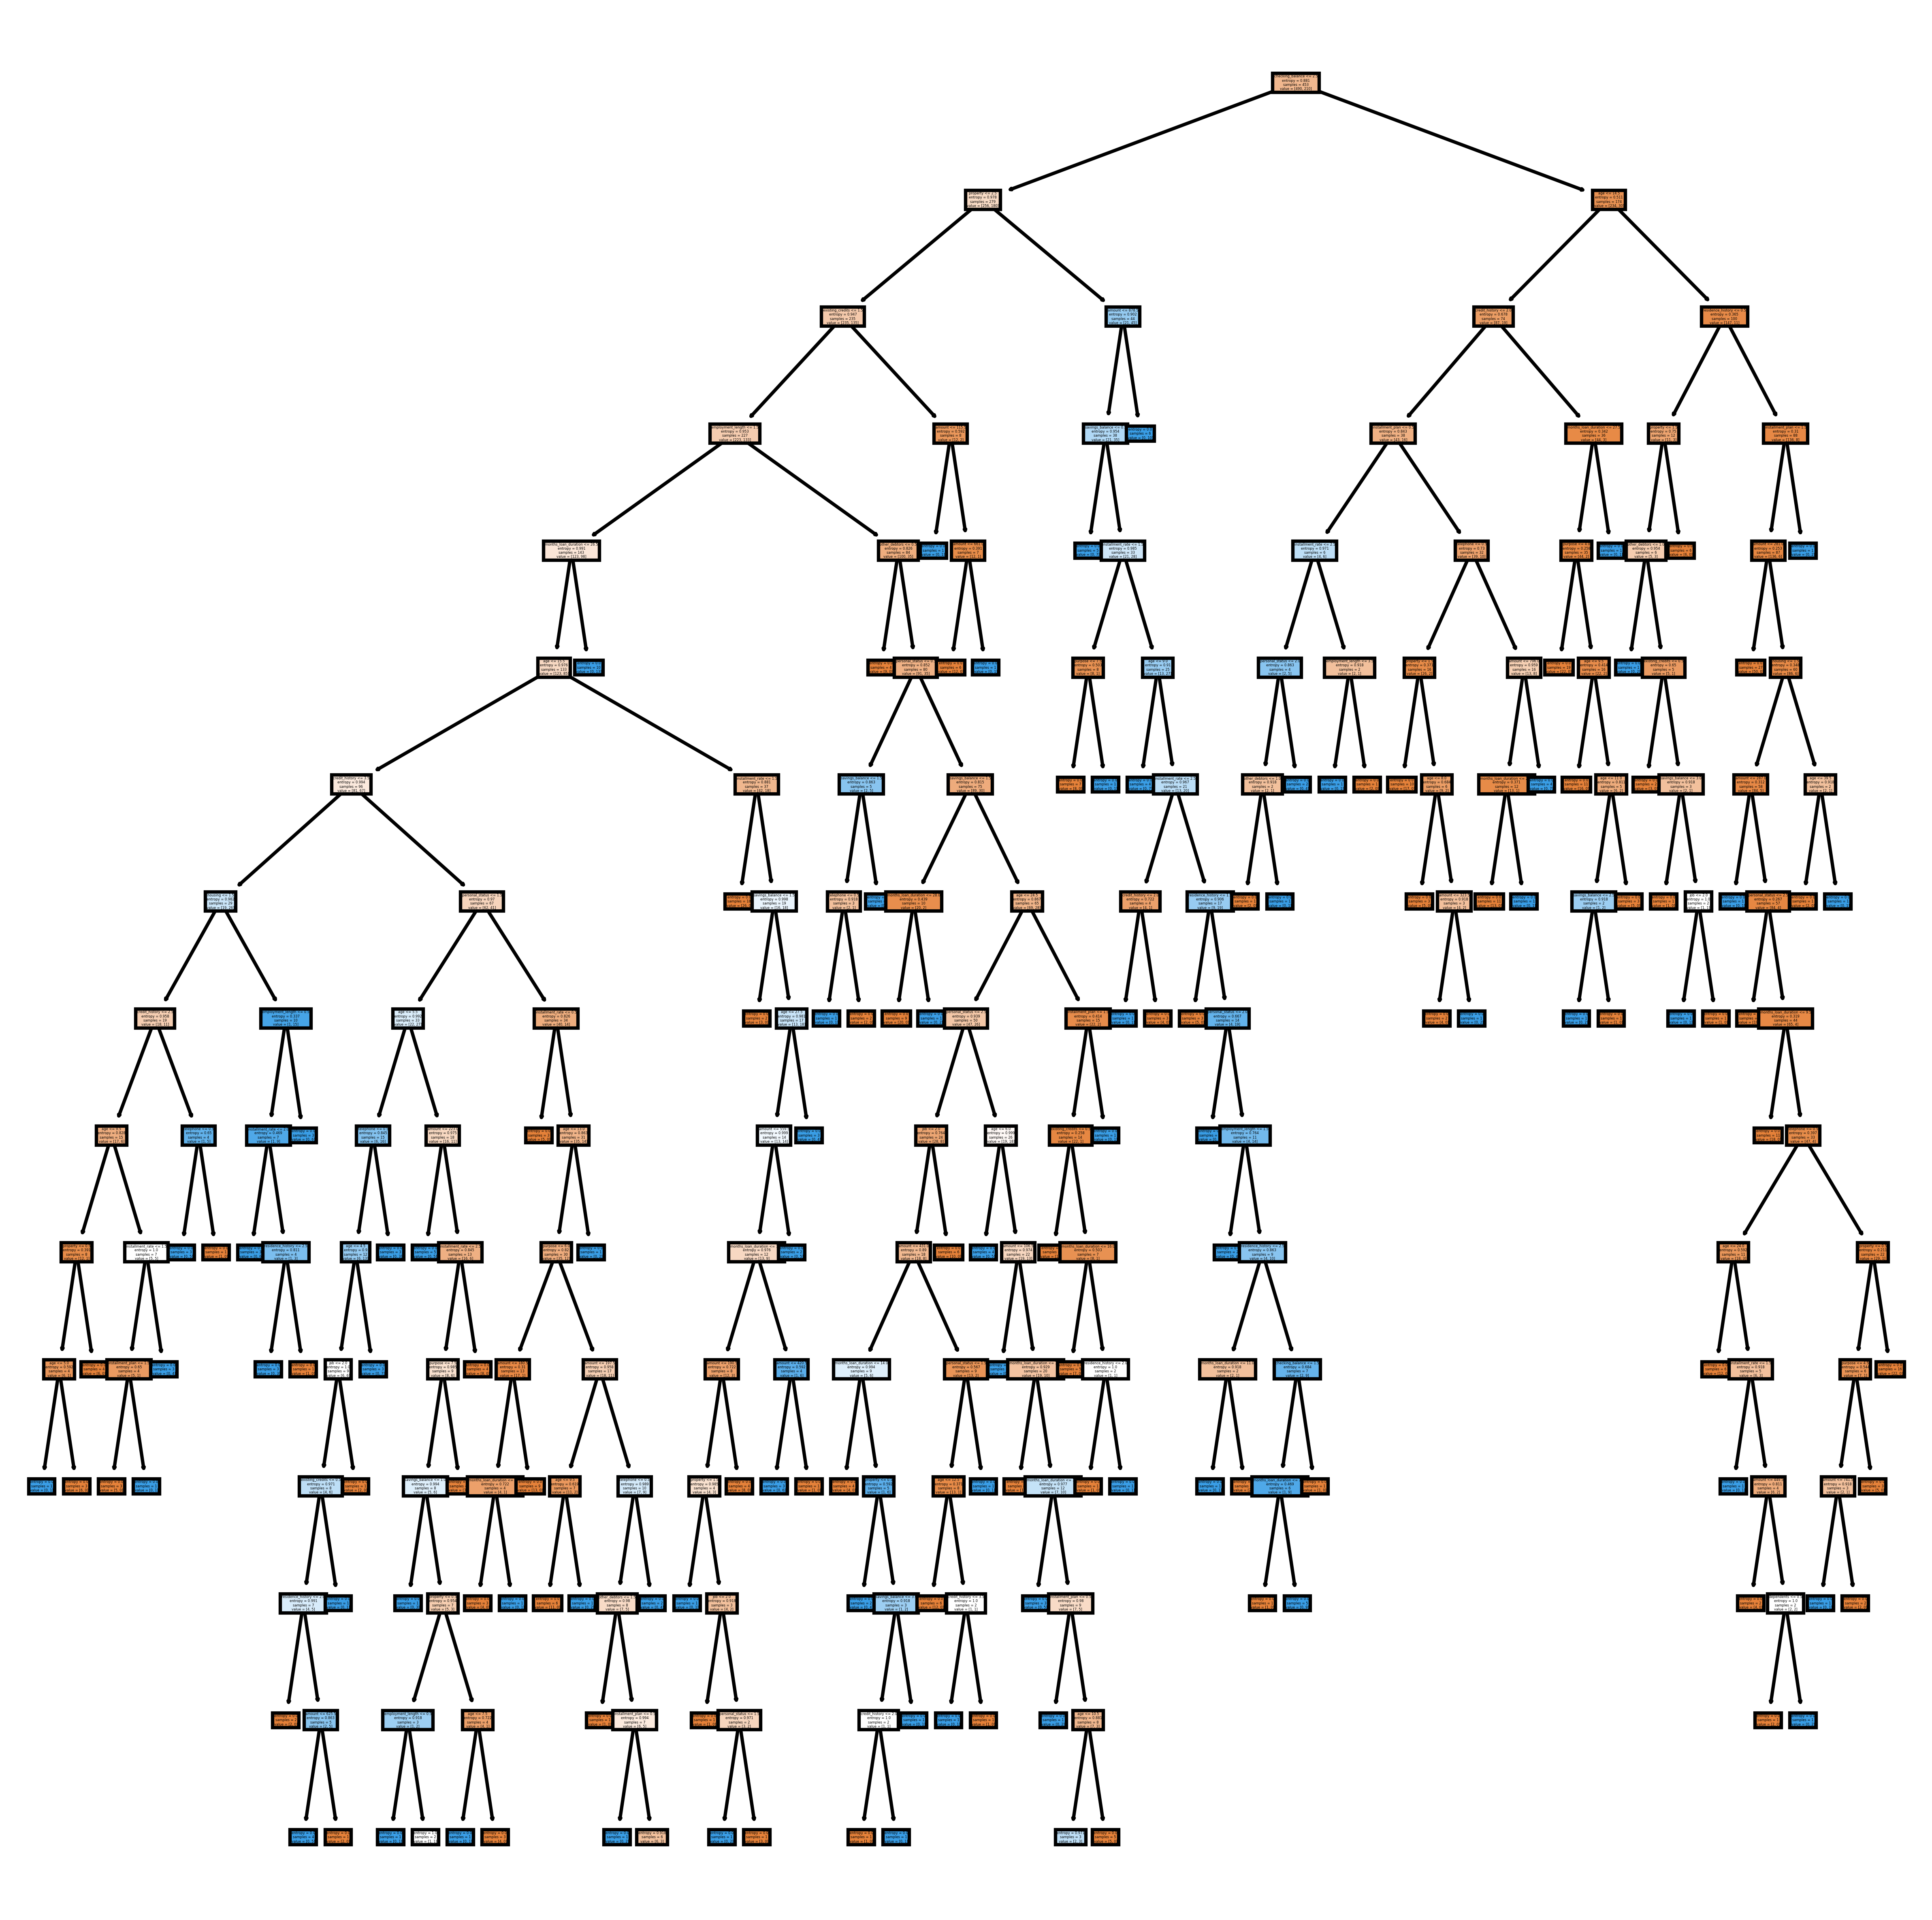

In [52]:
fig = plt.subplots(figsize = (10,10),dpi = 600)
tree.plot_tree(clfr.estimators_[10],
              feature_names = X_train.columns,
              filled = True);

In [53]:
predictions = clfr.predict(X_test)

In [54]:
predictions

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1], d

In [55]:
confusion_matrix(y_test,predictions)


array([[201,  18],
       [ 49,  32]], dtype=int64)

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

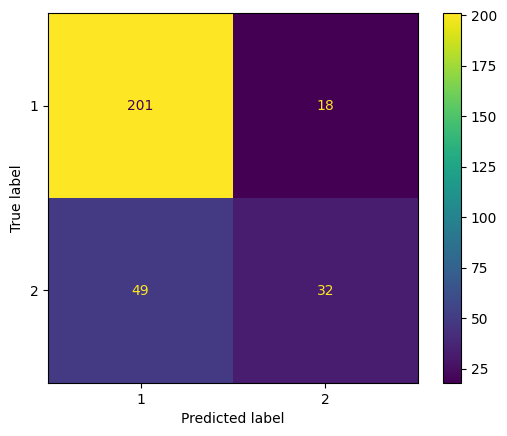

In [57]:
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(
        confusion_matrix = cm,
    display_labels = clfr.classes_)
disp.plot()

In [58]:
from sklearn.metrics import precision_score,recall_score,f1_score



In [61]:
print(f'Accuracy score is: {accuracy_score(y_test,predictions)}')
print(f'precision score is : {precision_score(y_test,predictions)}')
print(f'recall score is : {recall_score(y_test,predictions)}')
print(f'f1 score is : {f1_score(y_test,predictions)}')

Accuracy score is: 0.7766666666666666
precision score is : 0.804
recall score is : 0.9178082191780822
f1 score is : 0.8571428571428573
